<a href="https://colab.research.google.com/github/hudamohmand/project-1-mortality/blob/main/project_1_bsds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1 - Adalia, Huda, Betanya, Khalid, Eliab, Musa

The goal of the first project is to do some wrangling, EDA, and visualization, and generate sequences of values. We will focus on:

- CDC National Health and Nutritional Examination Survey (NHANES, 1999-2000): https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=1999
- CDC Linked Mortality File (LMF, 1999-2000): https://www.cdc.gov/nchs/data-linkage/mortality-public.htm

NHANES is a rich panel dataset on health and behavior, collected bi-yearly from around 1999 to now. We will focus on the 1999 wave, because that has the largest follow-up window, providing us with the richest mortality data. The mortality data is provided by the CDC Linked Mortality File.

The purpose of the project is to use $k$-NN to predict who dies (hard or soft classification) and how long they live (regression).

### Part 1: Wrangling and EDA (40/100 pts)

First, go to the NHANES and LMF web sites and familiarize yourself with the data sources. Download codebooks. Think about what resources are available. The CDC Linked Mortality File is somewhat of a pain to work with, so I have pre-cleaned it for you. It is available at httts://github.com/ds4e/undergraduate_ml_assignments in the data folder, as `lmf_parsed.cav`. From the CDC LMF web page, get the SAS program to load the data; it is the real codebook.

Second, download the demographic data for the 1999--2000 wave from the NHANES page. You can use the following code chunk to merge the LMF and DEMO data:

``` python
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable
```

Third, the variables `ELIGSTAT`, `MORTSTAT`, `PERMTH_INT`, and `RIDAGEEX` are particularly important. Look them up in the documentation and clearly describe them. (5/100 pts.)

**Answer:**

`ELIGSTAT` -  Eligibility Status for Mortality Follow-Up

Shows whether a respondent could be linked to the National Death Index for mortality tracking. 1 = Eligible adult, 2 = Under 18, 3 = Otherwise ineligible. We only keep ELIGSTAT == 1 since the other groups don't have usable mortality data.

`MORTSTAT` - Final Mortality Status

Binary variable indicating whether someone died by the end of follow-up (2019). 0 = assumed alive, 1 = confirmed dead. This is our classification target. Worth noting that 0 doesn't guarantee they're alive — the NDI linkage can miss some deaths, so there's a little built-in noise.

`PERMTH_INT` - Person-Months of Follow-Up

Counts the months between the NHANES interview and either death or the end of the study window. For people who died, this tells us roughly how long they lived after the survey. For survivors it's censored — we just know they made it at least that far. This is our regression target.

`RIDAGEEX` - Age at Examination

Age at the time of the physical exam, stored in months rather than years (divide by 12 to convert). Age is probably the single strongest predictor of mortality in this dataset, so it'll likely end up doing a lot of the heavy lifting in our k-NN model.

--


Second, the goal of the project is to use whatever demographic, behavioral, and health data you like to predict mortality (`MORTSTAT`) and life expectancy (`PERMTH_INT`). Go to the NHANES 1999--2000 web page and select your data and download it. Clearly explain your rationale for selecting these data. Use `.merge` to combine your data into one complete dataframe. Document missing values. (5/100 pts)

**Answer:** In addition to demographic information, we selected blood pressure examination data and immunization questionnaire data from the NHANES 1999–2000 survey to help predict mortality status (MORTSTAT) and survival time (PERMTH_INT). We decided to use these datasets because we believe they showcase important aspects of healthcare behavior which correlates strongly with long-term health outcomes and mortality status and survival time. The blood pressure dataset was included because it is a big factor for diseases, strokes, and other health conditions. Immunization was chosen because we believe it may reflect how aware individual's are of their health and it will showcase if any precautions were taken when predicting life expectancy.

--


Third, do basic EDA and visualization of the key variables. Are any important variables skewed? Are there outliers? How correlated are pairs of variables? Do pairs of categorical variables exhibit interesting patterns in contingency tables? Provide a clear discussion and examination of the data and the variables you are interested in using. (20/100 pts)

**Answer:**

Visualization 1) BPXSAR – Average Systolic Blood Pressure (mmHg):
This histogram shows the distribution of average systolic blood pressure among participants. The data is right-skewed, with most readings falling between 110 and 140 mmHg. The mean is slightly higher than the median, which is being pulled up by some participants with really high blood pressure readings on the right side of the distribution. There are some outliers above 160 mmHg, but they aren't super common. Since high systolic blood pressure is a known risk factor for heart disease and other serious conditions, this variable could be a useful predictor of mortality in our k-NN model.

Visualization 2) BPXDAR – Average Diastolic Blood Pressure (mmHg):
This histogram displays the distribution of average diastolic blood pressure across participants. The distribution looks pretty symmetric compared to systolic blood pressure, with most readings centered around 70–72 mmHg. There are a few low outliers below 50 mmHg which could be measurement issues or just individuals with certain health conditions. Overall the data looks fairly normal without too many extreme values. When you look at it alongside the systolic blood pressure variable, the two together give a better picture of someone's cardiovascular health, which is why we included both in our model.

Visualization 3) BPXPLS - Pulse Rate (bpm): This histogram shows the distribtuion of resting pulse rate amoung participants. The data is slightly right-skewed, with most pulse rates between about 60 and 85 bpm. The mean pulse rate is about 74 bpm and the median is about 72bpm, which are close, showing the distribtion is fairly normal. There are a few possible high outliers above 100 bpm but they are uncommon. Overall, pulse rate appears reasonably distributed without extreme outliers. A a continous cardiovascular measure, it may be related to other blood pressure variables in the BPX dataset.

Visualization 4) IMQ010 - Ever Recieved Hepatitis B Vaccine: This bar graph shows a highly skewed distribution. The majority of participants (about 78.6%) reported being unsure whether they had received the Hepatitis B vaccine. Only 5.5% reported yes and 4.9% reported no, while 11.1% of responses were missing. Since this is a categorical variable, outliers do not apply. The large unsure and missing categories suggest many participants may not know or remember thier vaccination history. This variable may show similar patterns to other vaccine variables in the IMG dataset, where unsure or missing responses are also common.

Visualization 5) IMQ020 - Ever Recieved Hepatitis A Vaccine: This bar graph shows a highly skewed distribution. A large proportion, about 52.5% of individuals were reported as being unsure on whether they has received the Hepatitis A vaccine, alongside that, 32.8% reported yes they had gotten the vaccine and 7.9% said no they had not. Additionally, 6.7% of the data was missing, which could mean some did not provide an answer or were not asked this specific question. Since it is a categorical variable, there are not outliers. This variable is also correlated with the Hepatitis B graph, and the Flu Shot graph. An interesting pattern these caegorical variables showcase is having majority unsure/missing percentages. This could be due to the controversy around vaccines, which makes it a bit difficult to connect mortality outcomes with getting vaccines.

Visualization 6) IMQ030 - Flu Shot in the Past 12 Months: This distribution is quite skewed with majority of the data (53.0%) consisting of missing responses. Outliers are not applicable because this variable is categorical. In contingency table analysis with mortality status, vaccination can provide us with meaningful patterns related to healthcare acces, knowledge, underlying health conditions or more. This variable can provide us with this meaningful insight however, it is essential to carefully interpret it due to the high proportion of missing data.



## Submission (10/100 pts)

Submit your work in a well-organized GitHub repo, where the code is appropriately commented and all members of the group have made significant contributions to the commit history. (10/100 pts)

In [ ]:
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable

FileNotFoundError: [Errno 2] No such file or directory: 'linked_mortality_file_1999_2000.csv'

In [ ]:
#Question 2 code
import pandas as pd

# Load BPX (blood pressure) dataset
bpx = pd.read_sas('BPX.xpt', format='xport')
print(bpx.head())

# Load IMQ (immunization) dataset
imq = pd.read_sas('IMQ.xpt', format='xport')
print(imq.head())

# Merge BPX and IMQ on SEQN
df = bpx.merge(imq, on='SEQN', how='inner')
print(df.head())

   SEQN  PEASCST1  PEASCTM1      PEASCCT1  BPXCHR  BPQ150A  BPQ150B  BPQ150C  \
0   1.0       1.0     151.0  5.397605e-79   110.0      NaN      NaN      NaN   
1   2.0       1.0     764.0  5.397605e-79     NaN      2.0      2.0      2.0   
2   3.0       1.0     571.0  5.397605e-79     NaN      2.0      2.0      2.0   
3   4.0       1.0      47.0  5.397605e-79   108.0      NaN      NaN      NaN   
4   5.0       1.0     694.0  5.397605e-79     NaN      2.0      2.0      2.0   

   BPQ150D  BPAARM  ...  BPXDI2  BPAEN2  BPXSY3  BPXDI3  BPAEN3  BPXSY4  \
0      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1      2.0     1.0  ...    56.0     2.0    98.0    56.0     2.0     NaN   
2      2.0     1.0  ...    64.0     2.0   112.0    62.0     2.0     NaN   
3      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4      2.0     1.0  ...    84.0     2.0   122.0    82.0     2.0     NaN   

   BPXDI4  BPAEN4  BPXSAR  BPXDAR  
0     NaN     NaN     NaN     Na

In [ ]:
#Check dataset size
print("Shape of merged dataset:", df.shape)

Shape of merged dataset: (9282, 33)


In [ ]:
#Make a Clean Table
missing_table = pd.DataFrame({
    "Missing Count": df.isna().sum(),
    "Percent Missing": (df.isna().sum() / len(df)) * 100
})

missing_table = missing_table[missing_table["Missing Count"] > 0]
missing_table.sort_values("Percent Missing", ascending=False)

,Missing Count,Percent Missing
BPXDB,9225,99.385908
BPXSY4,7639,82.299073
BPXDI4,7639,82.299073
BPXCHR,7538,81.210946
BPAEN4,7146,76.987718
IMQ030,4840,52.143934
BPXDI3,3027,32.611506
BPXSY3,3026,32.600733
BPXDI2,2914,31.394096
BPXSY2,2914,31.394096


Missing Data Documentation:

After merging the BPX (Blood Pressure) and IMQ (Immunization) datasets using an inner join on SEQN, I examined missing values across all variables.
Several variables contain missing observations. The missingness in BPX variables likely occurs because not all participants completed the physical examination where blood pressure was measured. Similarly, IMQ variables may have missing data due to age restrictions or nonresponse to specific immunization questions.
The percentage of missing values varies across variables. Variables with very high missingness may need to be removed or carefully handled before modeling to avoid bias.
Overall, the missing data appears to result from survey design and participant nonresponse rather than data entry errors.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', font_scale=1.1)
plt.rcParams['figure.dpi'] = 130
np.random.seed(42)

bpx = pd.read_sas('BPX.xpt', format='xport')
imq = pd.read_sas('IMQ.xpt', format='xport')

imq['IMQ010'] = imq['IMQ010'].replace({7:np.nan, 9:np.nan})
imq['IMQ020'] = imq['IMQ020'].replace({7:np.nan, 9:np.nan})
imq['IMQ030'] = imq['IMQ030'].replace({7:np.nan, 9:np.nan})

# FIGURE 1: BPXSAR
fig, ax = plt.subplots(figsize=(8, 5))
data = bpx['BPXSAR'].dropna()
ax.hist(data, bins=40, color='steelblue', edgecolor='white', alpha=0.85)
ax.axvline(data.mean(),   color='black', linestyle='--', lw=1.5, label=f'Mean = {data.mean():.1f}')
ax.axvline(data.median(), color='red',   linestyle=':',  lw=1.5, label=f'Median = {data.median():.1f}')
ax.set_title('BPXSAR — Average Systolic Blood Pressure', fontweight='bold', pad=12)
ax.set_xlabel('Systolic BP (mmHg)', labelpad=8)
ax.set_ylabel('Count', labelpad=8)
ax.legend(fontsize=9, loc='upper right')
ax.text(0.97, 0.75, f'skew = {data.skew():.2f}\nn = {len(data):,}',
        transform=ax.transAxes, ha='right', va='top', fontsize=9,
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8))
plt.tight_layout(pad=2.0)
plt.savefig('fig1_BPXSAR.png', bbox_inches='tight')
plt.show()

# FIGURE 2: BPXDAR
fig, ax = plt.subplots(figsize=(8, 5))
data = bpx['BPXDAR'].dropna()
ax.hist(data, bins=40, color='mediumseagreen', edgecolor='white', alpha=0.85)
ax.axvline(data.mean(),   color='black', linestyle='--', lw=1.5, label=f'Mean = {data.mean():.1f}')
ax.axvline(data.median(), color='red',   linestyle=':',  lw=1.5, label=f'Median = {data.median():.1f}')
ax.set_title('BPXDAR — Average Diastolic Blood Pressure', fontweight='bold', pad=12)
ax.set_xlabel('Diastolic BP (mmHg)', labelpad=8)
ax.set_ylabel('Count', labelpad=8)
ax.legend(fontsize=9, loc='upper right')
ax.text(0.97, 0.75, f'skew = {data.skew():.2f}\nn = {len(data):,}',
        transform=ax.transAxes, ha='right', va='top', fontsize=9,
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8))
plt.tight_layout(pad=2.0)
plt.savefig('fig2_BPXDAR.png', bbox_inches='tight')
plt.show()

# FIGURE 3: BPXPLS
fig, ax = plt.subplots(figsize=(8, 5))
data = bpx['BPXPLS'].dropna()
ax.hist(data, bins=40, color='mediumpurple', edgecolor='white', alpha=0.85)
ax.axvline(data.mean(),   color='black', linestyle='--', lw=1.5, label=f'Mean = {data.mean():.1f}')
ax.axvline(data.median(), color='red',   linestyle=':',  lw=1.5, label=f'Median = {data.median():.1f}')
ax.set_title('BPXPLS — Pulse Rate', fontweight='bold', pad=12)
ax.set_xlabel('Pulse Rate (bpm)', labelpad=8)
ax.set_ylabel('Count', labelpad=8)
ax.legend(fontsize=9, loc='upper right')
ax.text(0.97, 0.75, f'skew = {data.skew():.2f}\nn = {len(data):,}',
        transform=ax.transAxes, ha='right', va='top', fontsize=9,
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8))
plt.tight_layout(pad=2.0)
plt.savefig('fig3_BPXPLS.png', bbox_inches='tight')
plt.show()

# FIGURE 4: IMQ010
fig, ax = plt.subplots(figsize=(7, 5))
vc = imq['IMQ010'].value_counts(dropna=False).sort_index()
lmap = {1.0:'Yes', 2.0:'No', 3.0:'Unsure'}
tick_labels = [lmap.get(k, 'Missing') if not pd.isna(k) else 'Missing' for k in vc.index]
bars = ax.bar(tick_labels, vc.values, color='steelblue', edgecolor='white',
              alpha=0.85, width=0.5)
for bar, val in zip(bars, vc.values):
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+40,
            f'{val:,}  ({val/len(imq):.1%})', ha='center', va='bottom', fontsize=9)
ax.set_title('IMQ010 — Ever Received Hepatitis B Vaccine', fontweight='bold', pad=12)
ax.set_ylabel('Count', labelpad=8)
ax.set_ylim(0, vc.max() * 1.15)
plt.tight_layout(pad=2.0)
plt.savefig('fig4_IMQ010.png', bbox_inches='tight')
plt.show()

# FIGURE 5: IMQ020
fig, ax = plt.subplots(figsize=(7, 5))
vc = imq['IMQ020'].value_counts(dropna=False).sort_index()
tick_labels = [lmap.get(k, 'Missing') if not pd.isna(k) else 'Missing' for k in vc.index]
bars = ax.bar(tick_labels, vc.values, color='mediumseagreen', edgecolor='white',
              alpha=0.85, width=0.5)
for bar, val i

SyntaxError: invalid syntax (2639288031.py, line 94)

### Part 2: $k$-NN classification/regression, write-up (50/100 pts)

Submit a notebook that clearly addresses the following, using code and markdown chunks:

1. Describe the data, particularly what an observation is and whether there are any missing data that might impact your analysis. Who collected the data and why? What known limitations are there to analysis? (10/100 pts)
2. Describe the variables you selected to predict mortality and life expectancy, and the rationale behind them. Analyze your variables using describe tables, kernel densities, scatter plots, and conditional kernel densities. Are there any patterns of interest to notice? (10/100 pts)
3. Using your variables to predict mortality using a $k$-Nearest Neighbor Classifier. Analyze its performance and explain clearly how you select $k$. (10/100 pts)
4. Using your variables to predict life expectancy using a $k$-Nearest Neighbor Regressor. Analyze its performance and explain clearly how you select $k$. (10/100 pts)
5. Describe how your model could be used for health interventions based on patient characteristics. Are there any limitations or risks to consider? (10/100 pts)

# 1)

In [ ]:
for c in ["IMQ010", "IMQ020", "IMQ030"]:
    if c in imq.columns:
        imq[c] = imq[c].replace({7: np.nan, 9: np.nan})
#replaces the values of 7 and 9 with nan

df_model = gdf.merge(mdf, on="SEQN", how="inner")
df_model = df_model.merge(bpx, on="SEQN", how="left")
df_model = df_model.merge(imq, on="SEQN", how="left")
#merges all the dataframes into 1 data frame

print("df_model shape:", df_model.shape)
df_model[["SEQN", "RIDAGEEX", "MORTSTAT", "PERMTH_INT"]].head()

NameError: name 'imq' is not defined

In this data set, each row represents a singular NHANES participant in the corresponding year's survey cycle. Once we have merged everything, the finished dataset product contains 9,965 participants and 183 variables. The CDC is an organization whose role is to monitor the health of the people in the USA. The CDC are the ones responsible for collecting this data. The mortality file links participants to the National Death Index and it provides mortality status(MORTSTAT) and survival time(PERMTH_INT). There are some values that are missing in the mortality column due to some participants not being eligible as they were still alive by the end of the process, which in turn reduced the amount usable observations within the data set. As for limitations, there are some. Like we stated before, there are some missing values, and all possible mortality factors are not included in the data.


# 2)

In [ ]:
print("Total rows in df_model:", df_model.shape[0])
print("Rows after dropna for modeling:", model_df.shape[0])
print("\nMissingness (%):")
print((df_model[features + ["MORTSTAT", "PERMTH_INT"]].isna().mean() * 100).sort_values(ascending=False))

Total rows in df_model: 9965
Rows after dropna for modeling: 3732

Missingness (%):
IMQ030        53.015554
PERMTH_INT    45.358756
MORTSTAT      45.358756
BPXDAR        27.596588
BPXSAR        27.596588
BPXPLS        27.215253
IMQ010        11.118916
RIDAGEEX       8.268941
IMQ020         6.703462
dtype: float64


In [ ]:
features = ["RIDAGEEX", "BPXSAR", "BPXDAR", "BPXPLS", "IMQ010", "IMQ020", "IMQ030"]
targets = ["MORTSTAT", "PERMTH_INT"]

model_df = df_model[features + targets].dropna().copy()
#drops nan values

print("Features used:", features)
print("Modeling sample size:", model_df.shape[0])
model_df.head()

Features used: ['RIDAGEEX', 'BPXSAR', 'BPXDAR', 'BPXPLS', 'IMQ010', 'IMQ020', 'IMQ030']
Modeling sample size: 3732


,RIDAGEEX,BPXSAR,BPXDAR,BPXPLS,IMQ010,IMQ020,IMQ030,MORTSTAT,PERMTH_INT
4,597.0,122.0,83.0,66.0,3.0,3.0,2.0,0.0,244.0
6,712.0,123.0,81.0,58.0,3.0,3.0,2.0,0.0,237.0
11,454.0,174.0,99.0,64.0,3.0,1.0,1.0,0.0,236.0
12,850.0,130.0,66.0,102.0,3.0,3.0,2.0,1.0,16.0
13,974.0,136.0,61.0,72.0,3.0,3.0,2.0,1.0,137.0


,RIDAGEEX,BPXSAR,BPXDAR,BPXPLS,IMQ010,IMQ020,IMQ030,MORTSTAT,PERMTH_INT
count,3732.000000,3732.000000,3.732000e+03,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000
mean,601.717042,126.675509,7.134084e+01,72.244373,2.866292,2.726152,1.829046,0.312165,204.965434
std,215.942975,21.197076,1.446789e+01,12.550163,0.447836,0.663423,0.376519,0.463439,63.052978
min,240.000000,73.000000,5.397605e-79,36.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,417.000000,112.000000,6.400000e+01,64.000000,3.000000,3.000000,2.000000,0.000000,201.000000
50%,589.500000,123.000000,7.200000e+01,72.000000,3.000000,3.000000,2.000000,0.000000,235.000000
75%,785.000000,138.000000,8.000000e+01,80.000000,3.000000,3.000000,2.000000,1.000000,242.000000
max,1019.000000,226.000000,1.320000e+02,134.000000,3.000000,3.000000,2.000000,1.000000,250.000000


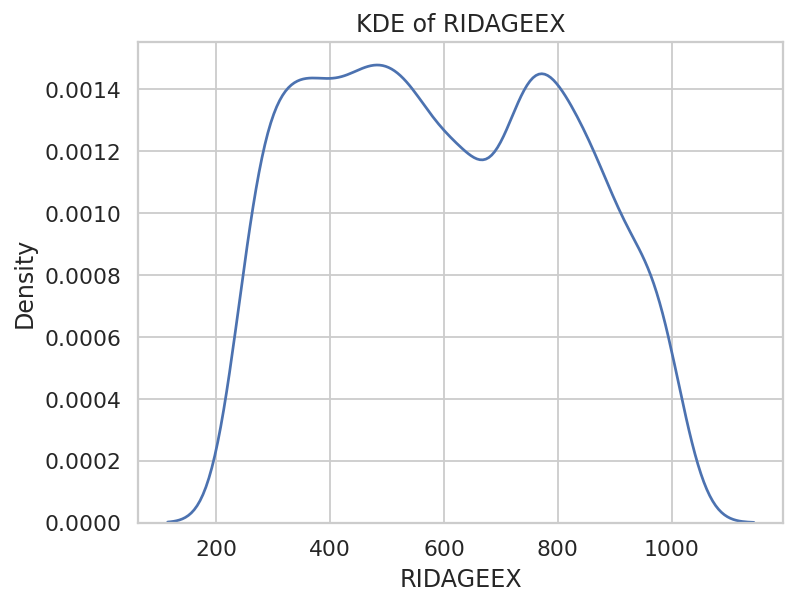

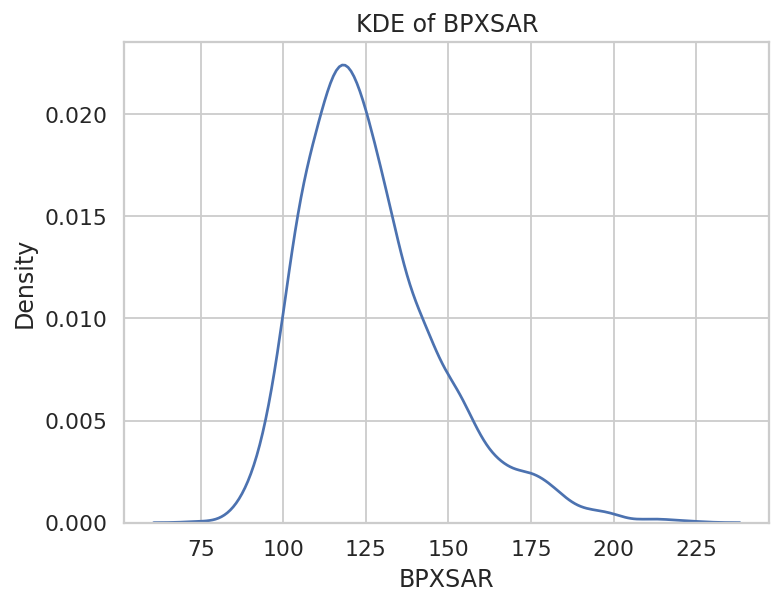

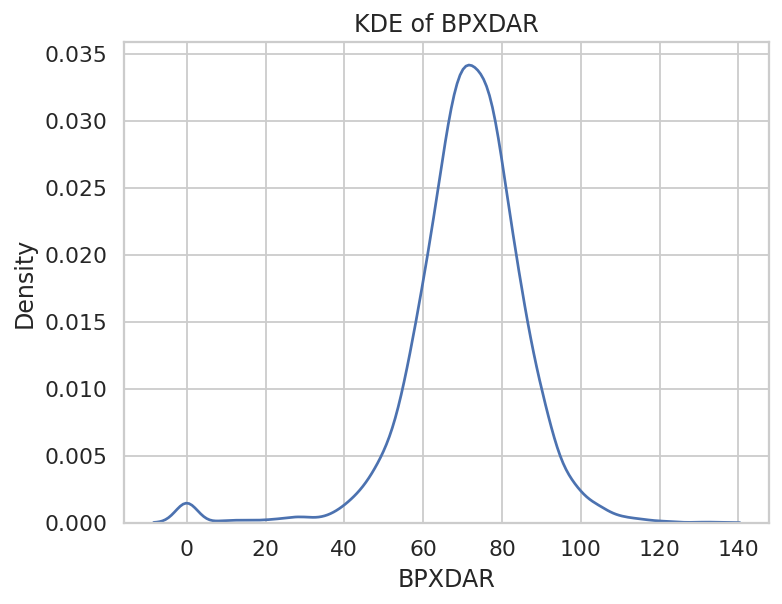

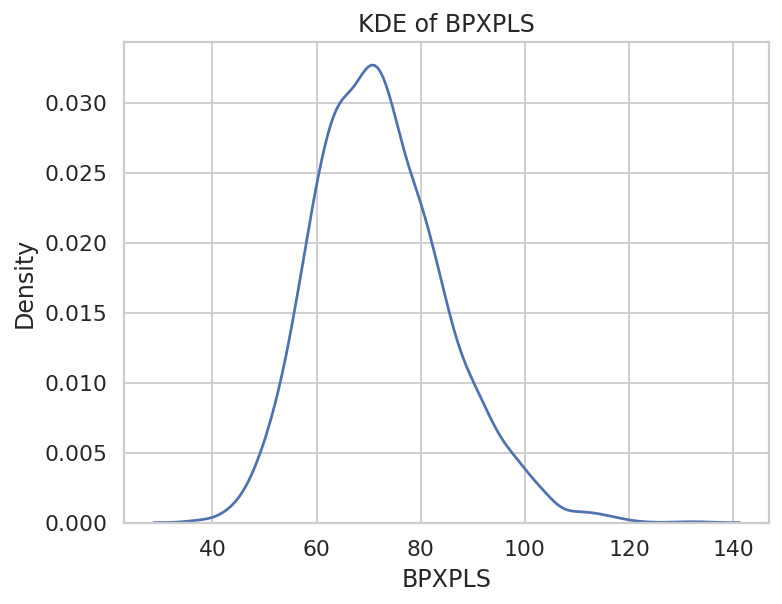

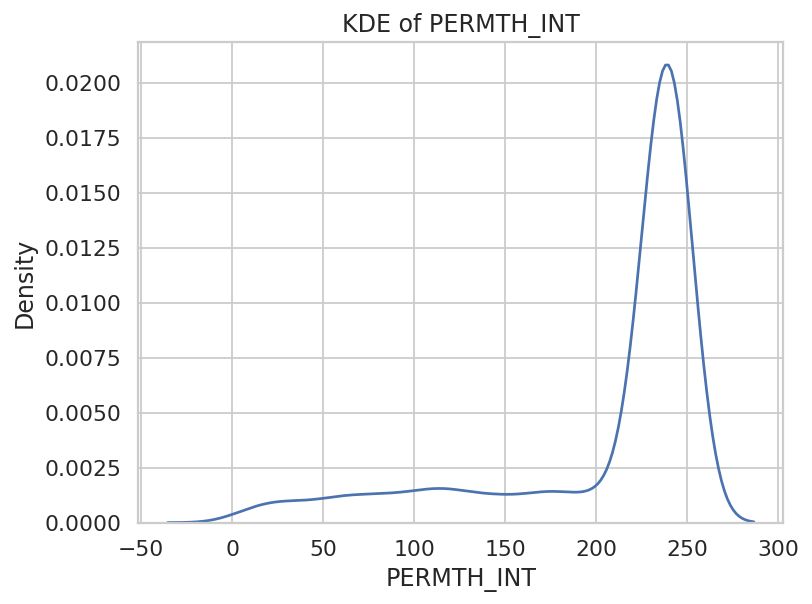

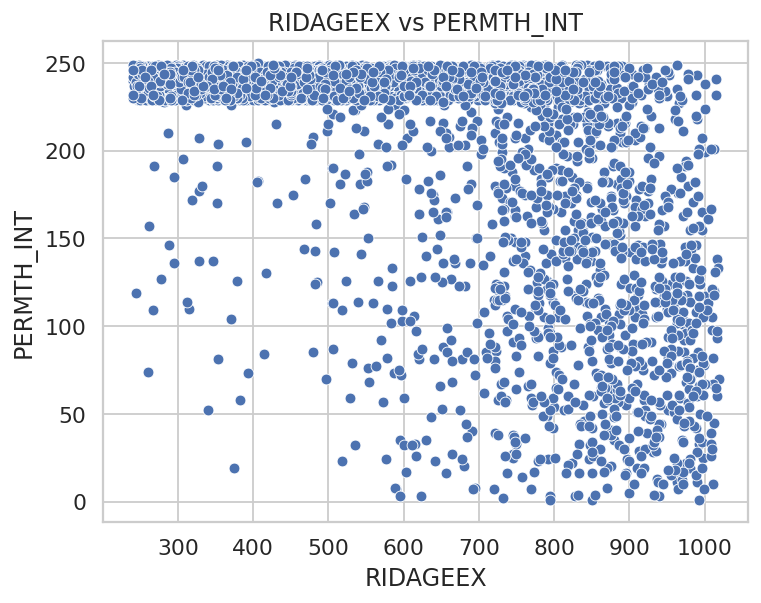

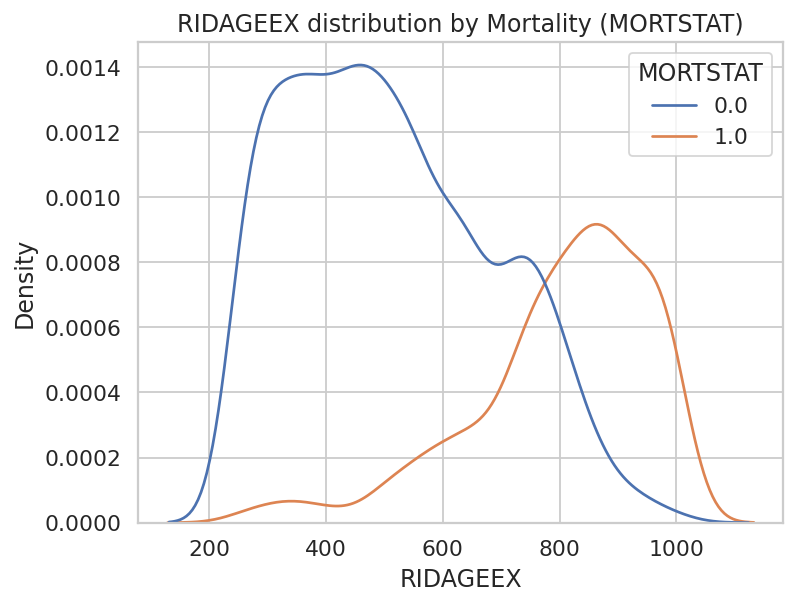

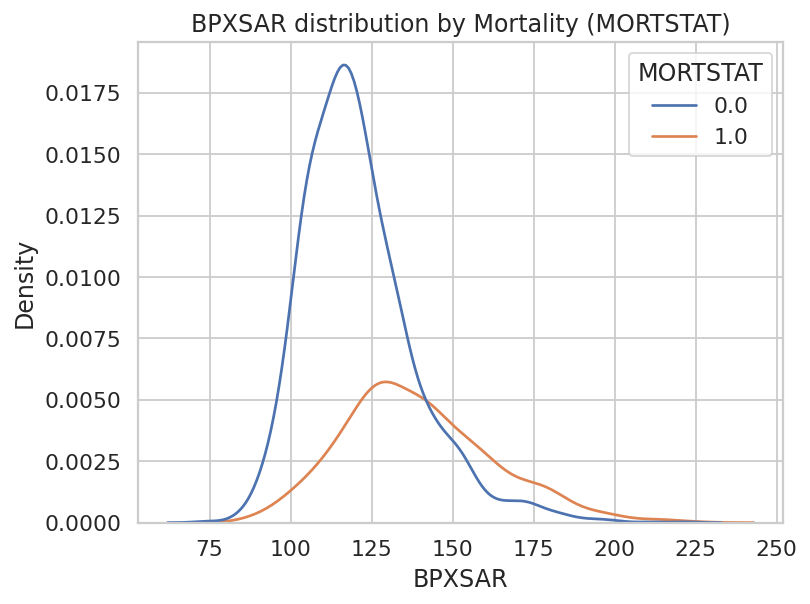

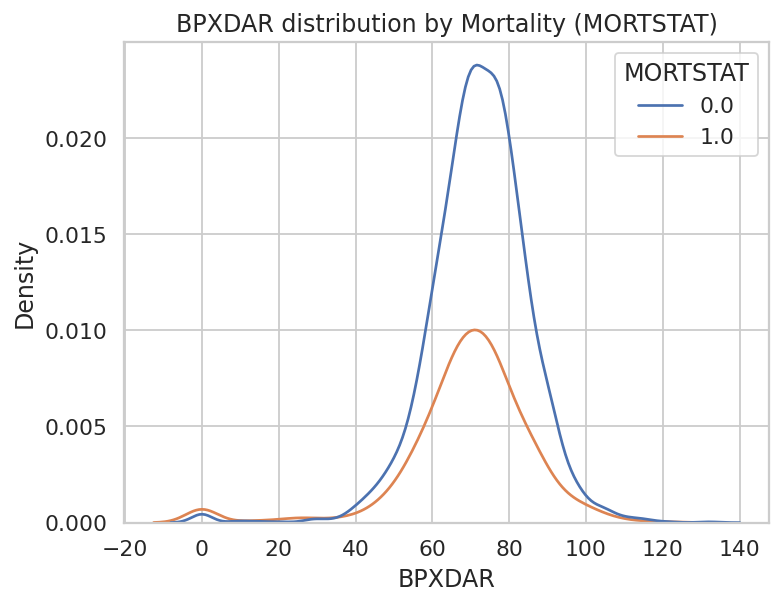

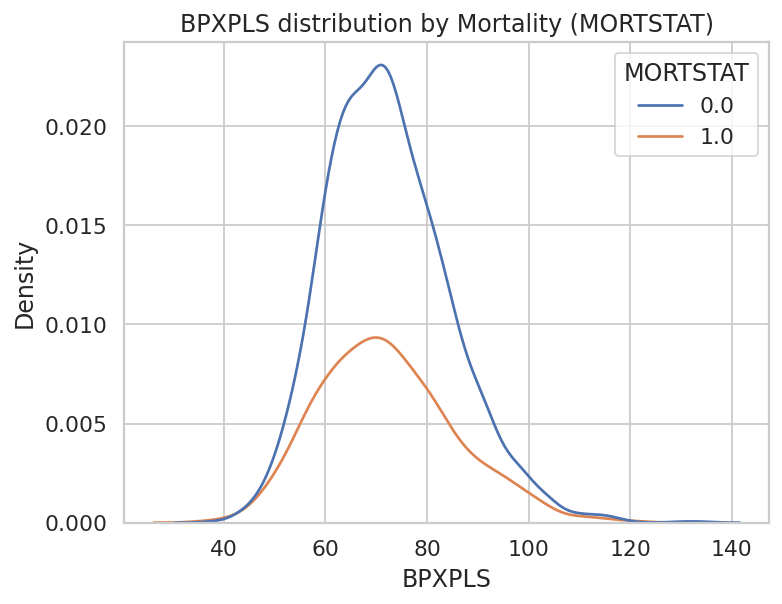

In [ ]:
display(model_df[features + ["MORTSTAT", "PERMTH_INT"]].describe())

cont = [c for c in ["RIDAGEEX", "BPXSAR", "BPXDAR", "BPXPLS", "PERMTH_INT"] if c in model_df.columns]
for c in cont:
    plt.figure()
    sns.kdeplot(model_df[c].dropna())
    plt.title(f"KDE of {c}")
    plt.show()
# KDE plots for continuous variables

if "RIDAGEEX" in model_df.columns:
    plt.figure()
    sns.scatterplot(data=model_df, x="RIDAGEEX", y="PERMTH_INT")
    plt.title("RIDAGEEX vs PERMTH_INT")
    plt.show()
#scatter plot of RIDAGEEX and PERMTH_INT


for c in [x for x in ["RIDAGEEX", "BPXSAR", "BPXDAR", "BPXPLS"] if x in model_df.columns]:
    plt.figure()
    sns.kdeplot(data=model_df, x=c, hue="MORTSTAT")
    plt.title(f"{c} distribution by Mortality (MORTSTAT)")
    plt.show()
# compares features with each other on kde plot and hue of MORTSTAT

Our group used age, blood pressure, pulse rate, and vaccination variables to predict mortality and life expectancy. Age was chosen due to the fact that it plays a huge role as a predictor for mortality. Blood pressure and pulse rate were chosen because they are important factors in determining cardiovascular health. Vaccination was used due to the fact that it is an indicator efforts of health issue prevention. The data set contains 3,700 observations after removing the missing data. The plots show that age is a clear separator in mortality groups. Blood pressure shows some differences between groups, but not as clearly as age. Overall, the charts suggest that age is the most important variable in predicting mortality.

# 3)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = model_df[features].copy()

y_class = model_df["MORTSTAT"].copy()
y_reg = model_df["PERMTH_INT"].copy()

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.30, random_state=42, stratify=y_class
)
# splits into train (70%) and test (30%) and stratifies (meaks sure the proportions in training is the same as dataset)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.30, random_state=42
)
# splits into train (70%) and test (30%)



scaler_c = StandardScaler()
X_train_c_s = scaler_c.fit_transform(X_train_c)
X_test_c_s = scaler_c.transform(X_test_c)

scaler_r = StandardScaler()
X_train_r_s = scaler_r.fit_transform(X_train_r)
X_test_r_s = scaler_r.transform(X_test_r)
#scales values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

k = 5
knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train_c_s, y_train_c)
# k = 5 and processes model

y_pred_c = knn_clf.predict(X_test_c_s)
# model predicting y

print("kNN Classification (MORTSTAT)")
print("k =", k)
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))
# accuracy, confusion matrix, and classification report

kNN Classification (MORTSTAT)
k = 5
Accuracy: 0.8089285714285714

Confusion Matrix:
 [[687  83]
 [131 219]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       770
         1.0       0.73      0.63      0.67       350

    accuracy                           0.81      1120
   macro avg       0.78      0.76      0.77      1120
weighted avg       0.80      0.81      0.80      1120



To predict mortality, we used a kNN classifier. We standardized the features so that all attributes were on the same wavelength. Using k = 5, we achieved about 81% accuracy. The matrix shows that the model predicts the survivors well, but had some struggles with the deceased. Since mortality was less common, it was expected. Overall, we would say that the model performed reasonably well.

In [ ]:
from sklearn.model_selection import cross_val_score

scaler_all = StandardScaler()
X_all_s = scaler_all.fit_transform(X)
# standardizes all the dataset
y_all = y_class
# creates target variable

k_values = range(1, 26)
cv_acc = []
#iterates between which k value is most efficient

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_acc.append(cross_val_score(knn, X_all_s, y_all, cv=5).mean())

best_k = list(k_values)[int(np.argmax(cv_acc))]
print("Best k (classification):", best_k)
print("Best 5-fold CV accuracy:", max(cv_acc))
#outputs which k value are most efficient

Best k (classification): 22
Best 5-fold CV accuracy: 0.8271678312894115


To choose k, we used 5-fold cross-validation(CV) spanning from values 1 to 25. The best value was k = 22 with slightly higher accuracy. Larger k values smooth predictions and reduce overfitting, which explains the improvement. This value provides a better balance between bias and variance.

# 4)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

k = 5
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train_r_s, y_train_r)
# creates model

y_pred_r = knn_reg.predict(X_test_r_s)
# creates model prediction

mse = mean_squared_error(y_test_r, y_pred_r)
# mean squared error between y test and y prediction
rmse = np.sqrt(mse)
# root mean squared error between y test and y prediction

r2 = r2_score(y_test_r, y_pred_r)

print("kNN Regression (PERMTH_INT)")
print("k =", k)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

kNN Regression (PERMTH_INT)
k = 5
MSE: 3128.370464285714
RMSE: 55.93183766233427
R2: 0.19906000136215984


In [ ]:
from sklearn.model_selection import cross_val_score

# standardize feature matrix
scaler_all_r = StandardScaler()
X_all_r_s = scaler_all_r.fit_transform(X)
# standardize feature matrix

y_all_r = y_reg
# target feature

k_values = range(1, 26)
cv_rmse = []
# iterates between which value of k is optimal

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    neg_mse = cross_val_score(knn, X_all_r_s, y_all_r, cv=5, scoring="neg_mean_squared_error").mean()
    cv_rmse.append(np.sqrt(-neg_mse))

best_k_r = list(k_values)[int(np.argmin(cv_rmse))]
print("Best k (regression):", best_k_r)
print("Best 5-fold CV RMSE:", min(cv_rmse))
#outputs which k value are most efficient

Best k (regression): 24
Best 5-fold CV RMSE: 51.50467530455914


This code creates a k-Nearest Neighbors regression model with 5 neighbors. It trains the model using the training data and then uses it to predict values for the test data. After making predictions, it checks how accurate the model is by calculating the Mean Squared Error and the R² score, which tell us how close the predictions are to the actual values.


# **5)**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# create k-NN regression model
k = 5
knn_reg = KNeighborsRegressor(n_neighbors=k)

# fit model
knn_reg.fit(X_train_r_s, y_train_r)

# make predictions
y_pred_r = knn_reg.predict(X_test_r_s)

# evaluate model
mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

for question 5 the code uses the trained k-Nearest Neighbors model to make predictions on the test data. It then compares the predicted values to the actual values to see how well the model performed. The Mean Squared Error shows how far off the predictions are on average, and the R^2 score shows how well the model explains the data.